In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pySMOKEPostProcessor import PostProcessor
from pySMOKEPostProcessor import OpenSMOKEppXMLFile
from pySMOKEPostProcessor import plot_areas
from pySMOKEPostProcessor import script_utils

# Cumulative reaction rate analysis

get reaction rates relevant to production/consumption of a species and plot them agains a chosen x axis.
First, a global ropa is performed on the selected species. the list of reactions is then used to get the reaction rates of each.
The global function that performs these operations is 

script.utils_cumulative_rates
> * `kin_xml_fld` ( *string* ): path to the folder containing the files relative to the kinetic mechanism named directly, after the pre-processing by OpenSMOKE++: **kinetics.xml** and **reaction_names.xml**.
> * `simul_fld` ( *string* ): path to the folder containing the files relative to the output of the simulations that are directly generated by OpenSMOKE++. Depending on the need different files are required. For the computation of the Rate Of Production only the file named **Output.xml** is required.
> * `rate_type` ( *string* ): reaction rates can be both production and consumption ("PC"), only production ("P"), or only consumption ("C")
> * `x_axis` ( *str* ): type of x axis (it should be an attribute of the Output.xml file. Otherwise, "time" is searched by default and a warning is given.)
> * `n_of_rxns` ( *int* default: 100 ): number of reactions to be considered in the ROPA for reaction selection.
> * `mass_ropa` ( *bool* default: False ): compute ropa by mass.
> * `threshold` ( *float* default: 0.01 ): cut reactions that contribute by less than 1% (or other chosen %) to the total rate (integrated over chosen x axis)

In [3]:
kin_xml_fld = os.path.join('..', 'data', 'Classes', 'kinetics-soot0')
simul_fld = os.path.join('..', 'data', 'Classes', 'Output-soot0')

*Warning: attribute x not found. using "time" as default


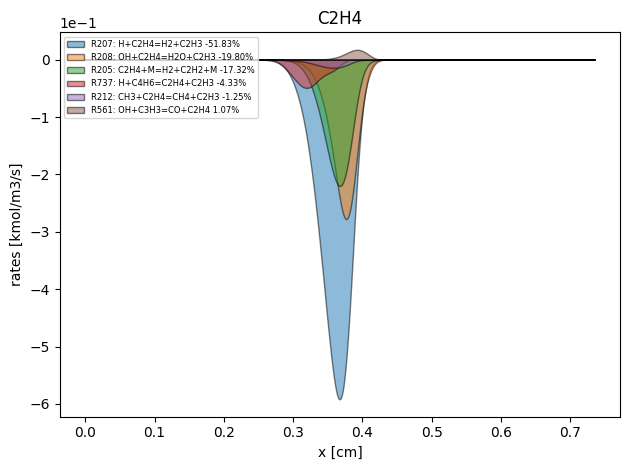

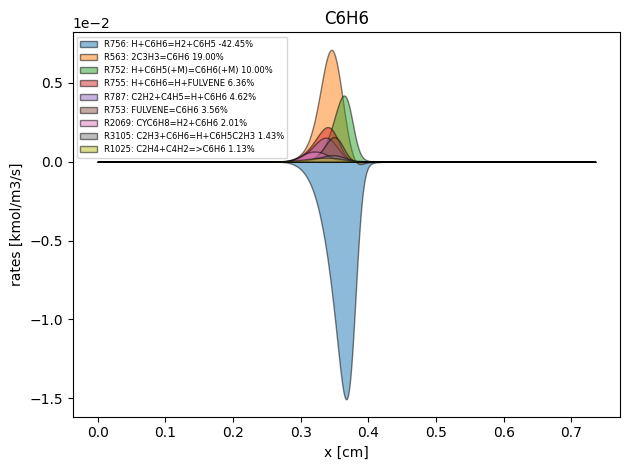

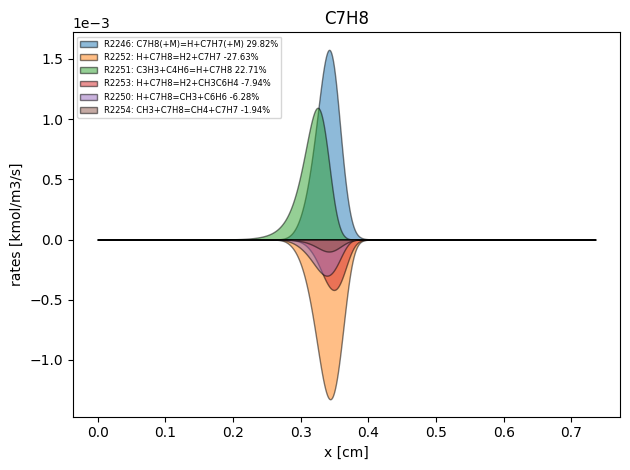

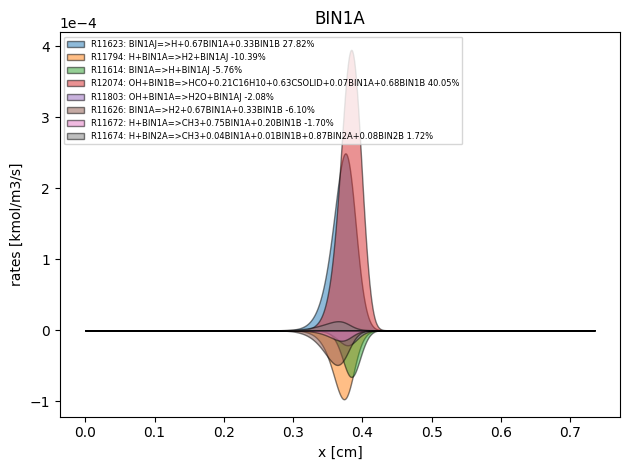

In [4]:
# PRODUCTION AND CONSUMPTION
species_list = ['C2H4','C6H6','C7H8','BIN1A']
rate_type = 'PC'          # P, C, PC
x_axis = 'x' # simulation of a counterflow flame - along axial coordinate
# 'x' is not found - time is used. time is actually the first column, which is the x[cm]
cumrates_dct = script_utils.cumulative_rates(simul_fld,
            kin_xml_fld,
            species_list,
            rate_type, x_axis,
            n_of_rxns = 40,
            mass_ropa = False,
            threshold = 0.01
            )
# plot
for species in species_list:
    fig, ax = plot_areas(cumrates_dct[species], 
                         ylabel = 'rates [kmol/m3/s]', 
                         xlabel = 'x [cm]', title = species,
                         fontsize = 6, loc = 'upper left')
    plt.show()


*Warning: attribute x not found. using "time" as default


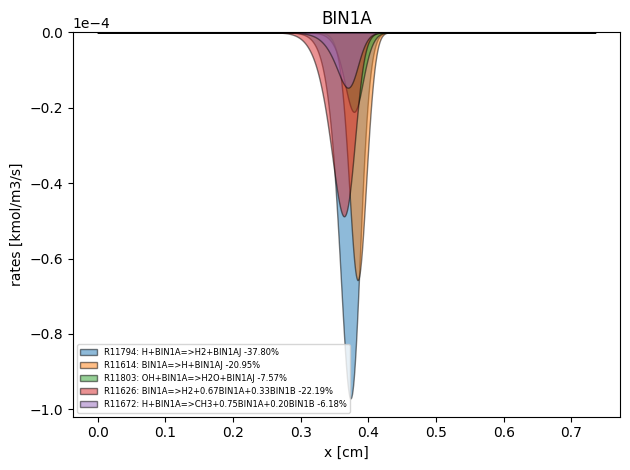

In [7]:
# only consumption
species_list = ['BIN1A']
rate_type = 'C'          # P, C, PC
x_axis = 'x' # simulation of a flame - along axial coordinate

cumrates_dct = script_utils.cumulative_rates(simul_fld,
            kin_xml_fld,
            species_list,
            rate_type, x_axis,
            n_of_rxns = 20,
            mass_ropa = False,
            threshold = 0.05
            )
# plot
for species in species_list:
    fig, ax = plot_areas(cumrates_dct[species], 
                         ylabel = 'rates [kmol/m3/s]', 
                         xlabel = 'x [cm]', title = species,
                         fontsize = 6, loc = 'lower left')
    plt.show()

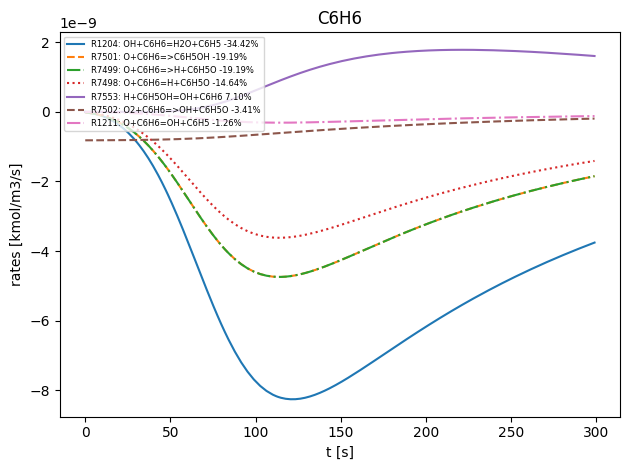

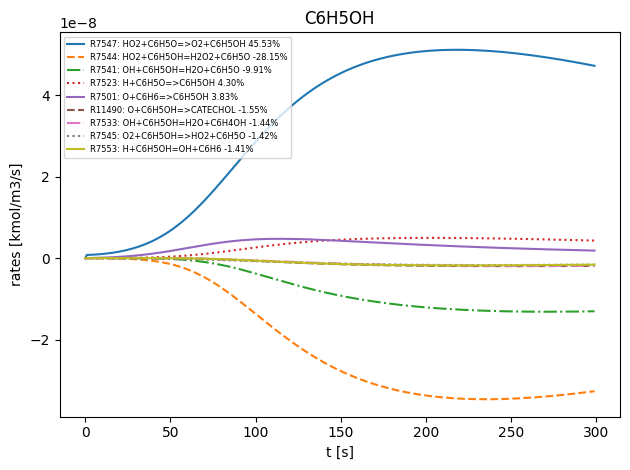

In [12]:
# PRODUCTION AND CONSUMPTION OF C6H6 IN A BATCH REACTOR
kin_xml_fld = os.path.join('..', 'data', 'Classes', 'kinetics')
simul_fld = os.path.join('..', 'data', 'Classes', 'simul-batch/Output')
species_list = ['C6H6','C6H5OH']
rate_type = 'PC'          # P, C, PC
x_axis = 'time' # simulation of a counterflow flame - along axial coordinate
# 'x' is not found - time is used. time is actually the first column, which is the x[cm]
cumrates_dct = script_utils.cumulative_rates(simul_fld,
            kin_xml_fld,
            species_list,
            rate_type, x_axis,
            n_of_rxns = 40,
            mass_ropa = False,
            threshold = 0.01
            )
# plot
for species in species_list:
    fig, ax = plot_areas(cumrates_dct[species], 
                         ylabel = 'rates [kmol/m3/s]', 
                         xlabel = 't [s]', title = species,
                         fontsize = 6, loc = 'upper left', plotlines=True)
    plt.show()